<a href="https://colab.research.google.com/github/adjie-code/UAS_Visi_Komputer/blob/main/Fitur_Ekstraksi_Tekstur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebelum kita memulai semuanya, mari kita mulai dengan mengimpor pustaka yang akan kita gunakan, seperti openCV, numpy, matplotlib, glob, dan skimage.

In [67]:
#impor library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

Langkah selanjutnya adalah mendefinisikan fungsi untuk metode yang akan kita eksekusi nanti. Fungsi pertama di bawah ini adalah fungsi <i>load_image()</i>. Tujuan dari fungsi ini adalah untuk memuat dataset/gambar dari komputer lokal dan menyimpannya ke dalam sebuah array. Nilai yang dikembalikan oleh fungsi ini adalah sebuah array gambar.

In [78]:
#membuat fungsi load_image
def load_image(arr):
    strr = "Datasets/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

Fungsi selanjutnya adalah fungsi <i>preprocessing()</i>. Fungsi ini bertujuan untuk memproses dataset kita menjadi gambar skala keabuan.

In [80]:
#membuat fungsi preprocessing
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

Fungsi selanjutnya yang harus didefinisikan adalah <i>extractLBP()</i>. Tujuan dari fungsi ini adalah mengembalikan 2 nilai. Nilai pertama adalah hasil ekstraksi tekstur dalam bentuk gambar. Dan nilai kedua adalah hasil ekstraksi tekstur dalam bentuk vektor.

In [81]:
#membuat fungsi extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

Fungsi terakhir adalah <i> featureExtraction().</i> Fungsi ini bertujuan untuk mengembalikan array baru yang berisi tekstur yang diekstraksi, beserta vektornya.

In [82]:
#membuat fungsi featureextraction
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

Langkah selanjutnya adalah memuat dataset dan menyimpannya dalam array

In [83]:
#memuat dataset
data=[]
data=load_image(data)

Setelah memuat dataset, lalu melakukan proses rubah gambar ke greyscale

In [84]:
#merubah gambar ke greyscale
dataPreprocessed = preprocessing(data)

Tahap terakhir adalah mendapatkan hasil ekstraksi tekstur

In [85]:
#mendapatkan hasil ekstraksi
dataExtracted,vector = featureExtraction(dataPreprocessed)

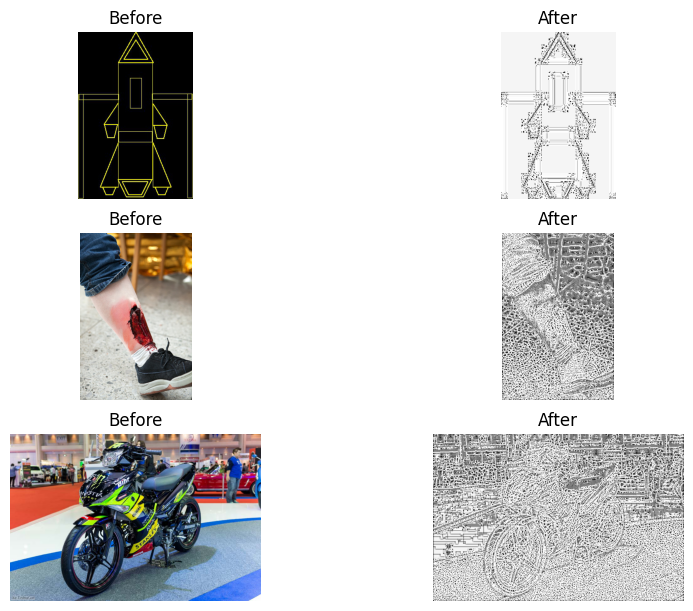

In [86]:
#menampilkan hasi ekstraksi tekstur
#Membuat plot Untuk histogram warna


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [87]:
#cetak vektor gambar
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.01833605 0.01219625 0.00450993 0.00156505 0.00107423 0.0011298
 0.00105571 0.00262076 0.00179656 0.00381538 0.00199104 0.00240776
 0.00255593 0.01299267 0.00223181 0.00248185 0.00195399 0.00833457
 0.00177804 0.00899207 0.00224107 0.00483405 0.00507483 0.00957549
 0.62962105 0.25483405]

Vector of Image 2 : [0.04386518 0.02355193 0.01660773 0.01274465 0.01200938 0.01276799
 0.01294306 0.01514886 0.01853927 0.02515668 0.03418998 0.04919879
 0.07088921 0.05113616 0.03199001 0.02394291 0.01893024 0.01648518
 0.01465868 0.01410431 0.01391758 0.01423269 0.01689367 0.02090263
 0.04723224 0.36796097]

Vector of Image 3 : [0.05109551 0.02827247 0.02100187 0.01446161 0.01059691 0.00932818
 0.0083544  0.01000936 0.01147706 0.01367041 0.01640449 0.02810393
 0.04927669 0.04250234 0.01610019 0.02000468 0.0120412  0.015103
 0.01029026 0.01032303 0.01059223 0.01433755 0.02160346 0.03078418
 0.08722612 0.43703886]
